**Heart Failure Predictor**
<br> By: Xinya Lu, Leo Tang, Cheng Zhang, Eric Zhang

Heart failure is a recurring condition where the heart muscles cannot pump enough blood to different parts of the body. Blood is essential to life as it is the fluid that carries all the necessary nutrients needed for our cells to function. When heart failure occurs, the heart pumps less blood and the organs in one’s body start to malfunction. People can die due to heart failure, and there are many factors that can increase the chance of death. These factors include: 

<u>Age</u>: Aging can cause one’s blood vessels and heart to change negatively. For example, the heart tends to pump blood at a slower rate during physical activity.
<br><u>Creatine phosphokinase (CPK)</u>:  An enzyme in the body; when CPK level is very high, there may be an injury or stress to the heart.
<br><u>Platelets</u>: Cell fragments in blood; low or high amounts of platelets means there may be a disease that can weaken the heart. 
<br><u>Serum creatinine</u>: Level of serum creatinine in the blood(mg/dL). High serum creatinine levels have reduces cardiac output, which  reduces renal blood flow. This lowers one’s ability to get treatment for heart failure. 
<br><u>Serum sodium</u>: Level of serum sodium in the blood(mEq/L). Low serum sodium levels may increase the chance of death from heart failure.
<br><u>Ejection fraction</u>: Percentage of blood leaving the heart each contraction. A lower percentage indicates organs might not get enough blood. 
<br><u>Smoking</u> : Smoking may lead to atherosclerosis and a higher risk of death from heart failure

This model will predict if a person we describe will survive a heart attack. We will use "https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records " to build our model, This dataset includes observations of 299 patients, including the above factors and if they survived heart failure. Through KNN classification, we will answer the question:

**Will a smoking 60 year old male with 100 mcg/L CPK, ejection fraction of 40%, 1 mg/dL of serum creatinine, 135 mg/dL of serum sodium, and 265000 kilo platelets/mL survive heart failure?**


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
heart_failure_data <- read_csv("heart_failure_clinical_records_dataset.csv", col_types="ddddddddddddc")
heart_failure_data

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
75,0,582,0,20,1,265000,1.90,130,1,0,4,1
55,0,7861,0,38,0,263358,1.10,136,1,0,6,1
65,0,146,0,20,0,162000,1.30,129,1,1,7,1
50,1,111,0,20,0,210000,1.90,137,1,0,7,1
65,1,160,1,20,0,327000,2.70,116,0,0,8,1
90,1,47,0,40,1,204000,2.10,132,1,1,8,1
75,1,246,0,15,0,127000,1.20,137,1,0,10,1
60,1,315,1,60,0,454000,1.10,131,1,1,10,1
65,0,157,0,65,0,263358,1.50,138,0,0,10,1


**Tidy/wrangled data**

In [4]:
heart_split <- initial_split(heart_failure_data, prop=0.75, strata=DEATH_EVENT)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [7]:
heart_failure <- select(heart_train, age, serum_creatinine, serum_sodium,
                        creatinine_phosphokinase, platelets, ejection_fraction, smoking, DEATH_EVENT)
names(heart_failure) <- c('age','serum_creatinine','serum_sodium','creatinine_phosphokinase','platelets','ejection_fraction', 'smoking', 'death') 
heart_failure

age,serum_creatinine,serum_sodium,creatinine_phosphokinase,platelets,ejection_fraction,smoking,death
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
75,1.90,130,582,265000,20,0,1
65,1.30,129,146,162000,20,1,1
65,2.70,116,160,327000,20,0,1
90,2.10,132,47,204000,40,1,1
75,1.20,137,246,127000,15,0,1
60,1.10,131,315,454000,60,1,1
65,1.50,138,157,263358,65,0,1
75,4.00,131,81,368000,38,1,1
62,0.90,140,231,253000,25,1,1


**Summary of Our Data**

In [8]:
heart_failure_summary <- heart_failure %>% 
                      summarize(n_observations = nrow(heart_failure),
                      average_age = mean(age, na.rm = TRUE),
                      average_creatinine_phosphokinase = mean(creatinine_phosphokinase, na.rm = TRUE),
                      average_platelets = mean(platelets, na.rm = TRUE),
                      average_serum_creatinine = mean(serum_creatinine, na.rm=TRUE),
                      average_serum_sodium = mean(serum_sodium, na.rm=TRUE),
                      average_ejection_fraction = mean(ejection_fraction, na.rm=TRUE))
heart_failure_summary

n_observations,average_age,average_creatinine_phosphokinase,average_platelets,average_serum_creatinine,average_serum_sodium,average_ejection_fraction
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
225,60.84148,574.0711,267101.8,1.356756,136.5644,38.18667


**Visualizing data**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



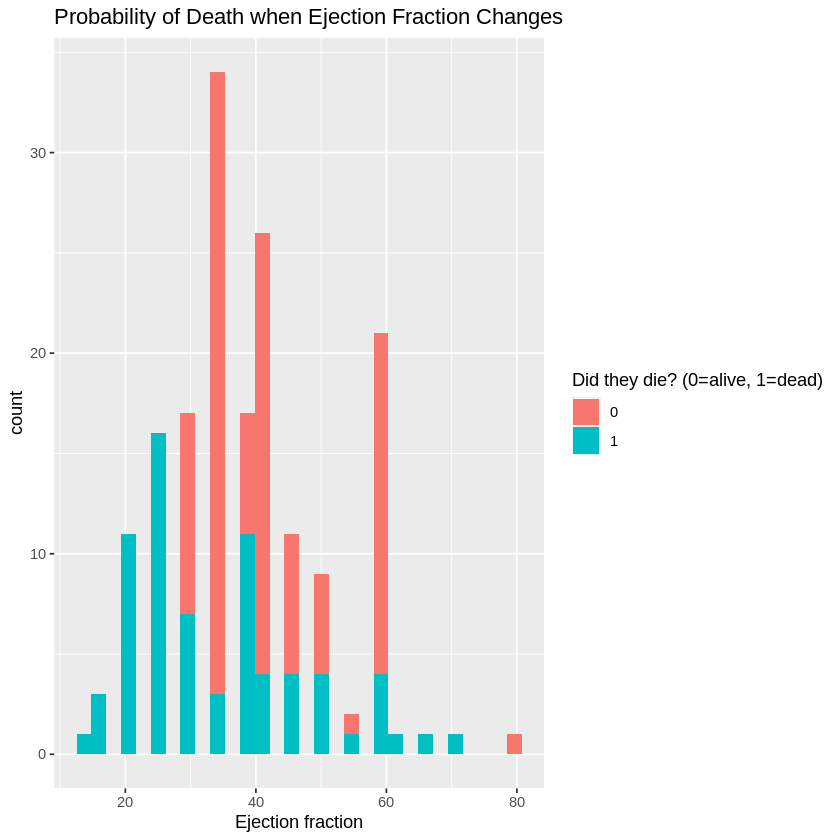

In [19]:
heart_failure_plot <- ggplot(heart_failure, aes(x = ejection_fraction, fill = death)) +
    geom_histogram(position="identity") +
    xlab("Ejection fraction") +
    labs(fill = "Did they die? (0=alive, 1=dead)") +
    ggtitle("Probability of Death when Ejection Fraction Changes")
heart_failure_plot

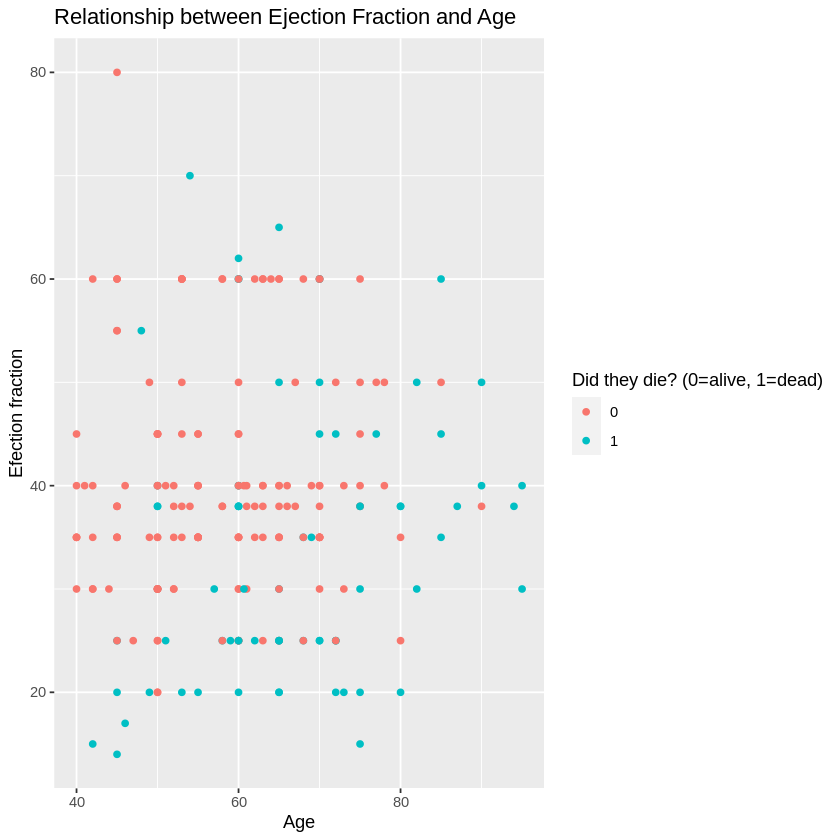

In [21]:
heart_failure_plot2 <- ggplot(heart_failure, aes(x = age, y = ejection_fraction, color = death)) +
    geom_point() +
    xlab("Age") +
    ylab("Efection fraction") +
    labs(color = "Did they die? (0=alive, 1=dead)") +
    ggtitle("Relationship between Ejection Fraction and Age")
heart_failure_plot2

**Method**

<u>Variables</u>: Age, smoking, serum creatinine levels, serum sodium levels, ejection fraction, CPK, platelets, and Death Event

We will be analyzing the data from the above columns, which represent the significant factors that can contribute to heart failure. Hence, we will create a model to see if an individual will survive heart failure. Our model will use KNN classification, where we interpret relationships between each column while colouring the points where death occured. This relationship will help determine a threshold where death is most likely, where points above this threshold represent individuals who died from heart failure. Putting an observation of a person into this model will help us predict if a person will be dead from heart failure.

It would be hard to visualize our results since we have more than 3 predictors. Though, we can visualize it by putting our data point on to different scatterplots, each with different variables to see if generally, the different plots show the same result. 


**Expected outcomes and significance**

Using the method above, the graphs of each of the variables will show a fitted plot such that the position of the point on the graph will help understand whether death is likely after heart failure. Understanding the relationship above allows for the outcome of heart failure to be predicted, which can help doctors make decisions, or help persuade patients to change their life choices so that they could change what the predictor forecasted.

<u>Future Questions:</u>
<br>Based on the model, what can we advise patients to do to increase their chances of surviving heart failure?
<br>Is this model reliable enough to help doctors with decisions? (For example, when deciding who to save if there is a shortage of equipment availiable.)
<br>Is there a way to increase the accuracy of our predictions?
